## Minimal example

Map creation is easy with Cartopy and Matplotlib.

Simply tell Matplotlib to use a specific map projection, and then add some coastlines to the axes:

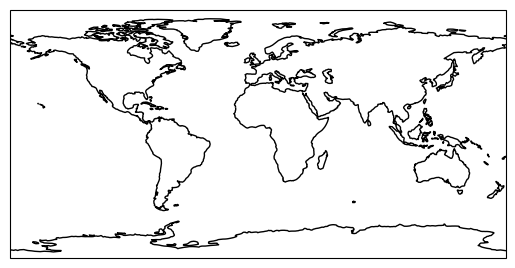

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# Save the plot by calling plt.savefig() BEFORE plt.show()
plt.savefig('coastlines.pdf')
plt.savefig('coastlines.png')

plt.show()

The first line sets up a `GeoAxes` (subclass of matplotlib.axes.Axes) instance which exposes a variety of other map related methods.
We use the `coastlines()` method to add coastlines to the map.

## Using different projections
A list of the available projections to be used with Matplotlib can be found on the Cartopy [projection list page](https://scitools.org.uk/cartopy/docs/latest/reference/projections.html#cartopy-projections).

Let's create another map in a different projection.

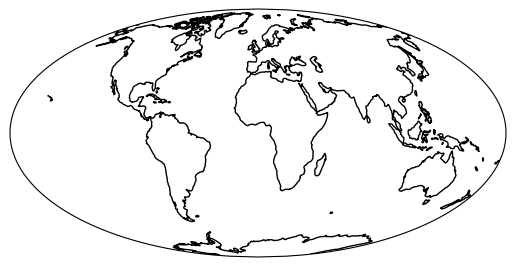

In [2]:
ax = plt.axes(projection=ccrs.Mollweide())
ax.coastlines()
plt.show()

## Adding data to the map
Once you have the map you want, data can be added to it exactly the same way as with normal Matplotlib axes.
By default, the coordinate system of any data added to a GeoAxes is the same as the coordinate system of the GeoAxes itself. Add the `transform` keyword with an appropriate `cartopy.crs.CRS` instance, to control which coordinate system the given data is in.

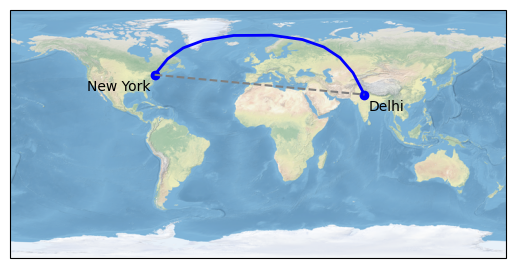

In [3]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

ny_lon, ny_lat = -75, 43
delhi_lon, delhi_lat = 77.23, 28.61

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='blue', linewidth=2, marker='o',
         transform=ccrs.Geodetic())

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='gray', linestyle='--',
         transform=ccrs.PlateCarree())

plt.text(ny_lon - 3, ny_lat - 12, 'New York',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.text(delhi_lon + 3, delhi_lat - 12, 'Delhi',
         horizontalalignment='left',
         transform=ccrs.Geodetic())

plt.show()

Notice how the line in blue between New York and Delhi is not straight on a flat `PlateCarree` map, this is because the `Geodetic` coordinate system is a truly spherical coordinate system, where a line between two points is defined as the shortest path between those points on the globe rather than 2d Cartesian space.

## Setting the extent of the map
By default, Matplotlib sets the limits of your Axes based on the data that you plot.

To set the extents of a cartopy GeoAxes, there are several convenient options:
- For "global" plots, use the `set_global()` method.
- To set the extents of the map based on a bounding box, in any coordinate system, use the `set_extent()` method.

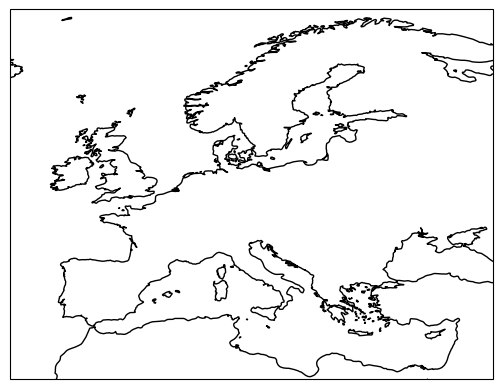

In [4]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_extent([-15, 40, 30, 70])
plt.show()